<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 7 - Due March 19, Thursday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

## Coding Assignments:

In [1]:
import numpy as np
import seaborn as sb
import sympy as sym
from sympy import *
from numpy import ma
from numpy.linalg import inv
from numpy import linalg as LA
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tabulate
from scipy.stats import gamma
from scipy import stats
np.random.seed(1100)

1. (20 Points)Implementing Example 6.1 on page 157 of Computational Statistics for r = 2,
produce a plot similar to FIGURE 6.2., report the acceptance rate of your algorithm. Show
the generated random samples by superimposing the following three items in another plot,
using different line type for different curves, and display of legend.

(a) a relative frequency histogram with appropriate number of bars for your generated random numbers with sample size n = 5000;

Generate variables and uniform and normal distributions

In [2]:
r = 2
n = 5000
z = np.random.normal(0, 1, n)
u = np.random.uniform(0,1,n)

In [3]:
def f_t_y(y, r):
    a = r - (1/3)
    b = 1 / np.sqrt(9 * a)
    t_y = a * (1 + b * y) ** 3
    return t_y

a = r - (1/3)
t = f_t_y(z, r)
z = z[t > 0]
u = u[t > 0]
t = t[t > 0]
g = np.exp(((z ** 2) / 2) + a * np.log(t/a) - t + a)
keep = (u <= g) * np.arange(1, len(t) + 1)

(b) an estimated probability density curve based on the generated random numbers;

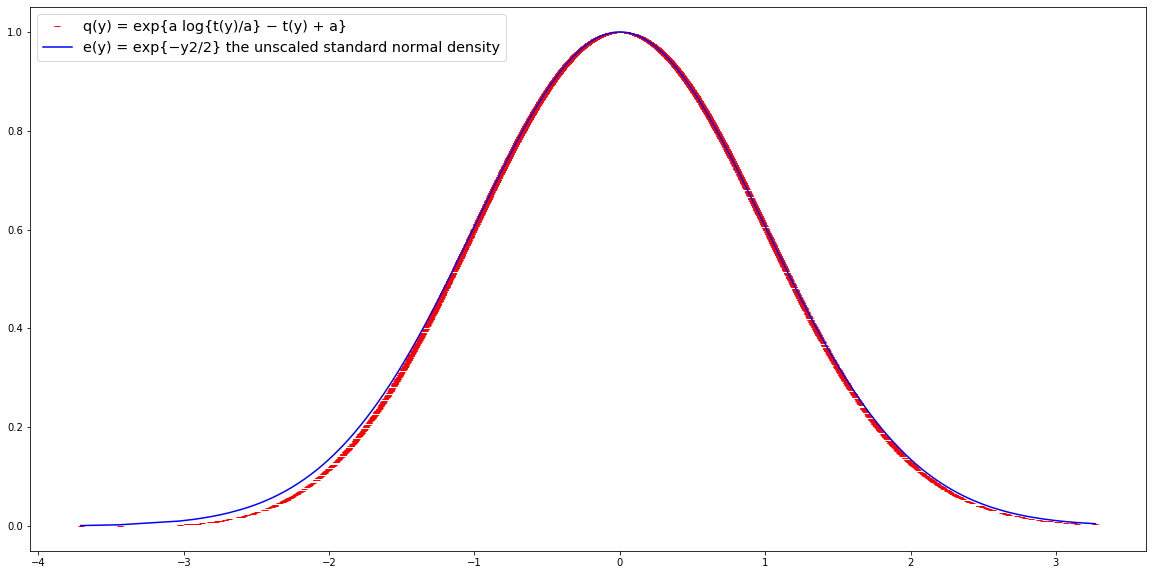

In [4]:
fig = plt.figure(figsize=(20, 10))

z = np.sort(z)
t2 = f_t_y(z,r)
            
frequency = stats.relfreq(t2[keep != 0], numbins = 100)
frequency2 = stats.relfreq(z[keep != 0], numbins = 100)
x_val = frequency.lowerlimit + np.linspace(0, frequency.binsize*frequency.frequency.size, frequency.frequency.size)
x_val2 = frequency2.lowerlimit + np.linspace(0, frequency2.binsize*frequency2.frequency.size, frequency2.frequency.size)
plt.plot(z, np.exp(a * np.log(t2/a) - t2 + a), 'r_', label = 'q(y) = exp{a log{t(y)/a} − t(y) + a}')
plt.plot(z, np.exp(-(z ** 2) / 2), 'b', label = 'e(y) = exp{−y2/2} the unscaled standard normal density')

plt.legend(fontsize ='x-large')

percent accepted:

In [5]:
(len(keep) - len(keep[keep == 0])) / n      

0.9836

In a simulation when r = 2, over 98% of candidate draws are accepted and a
plot of e(y) and q(y) against y shows that the two curves are nearly superimposed.

(c) the true Gamma(2,1) probability density curve

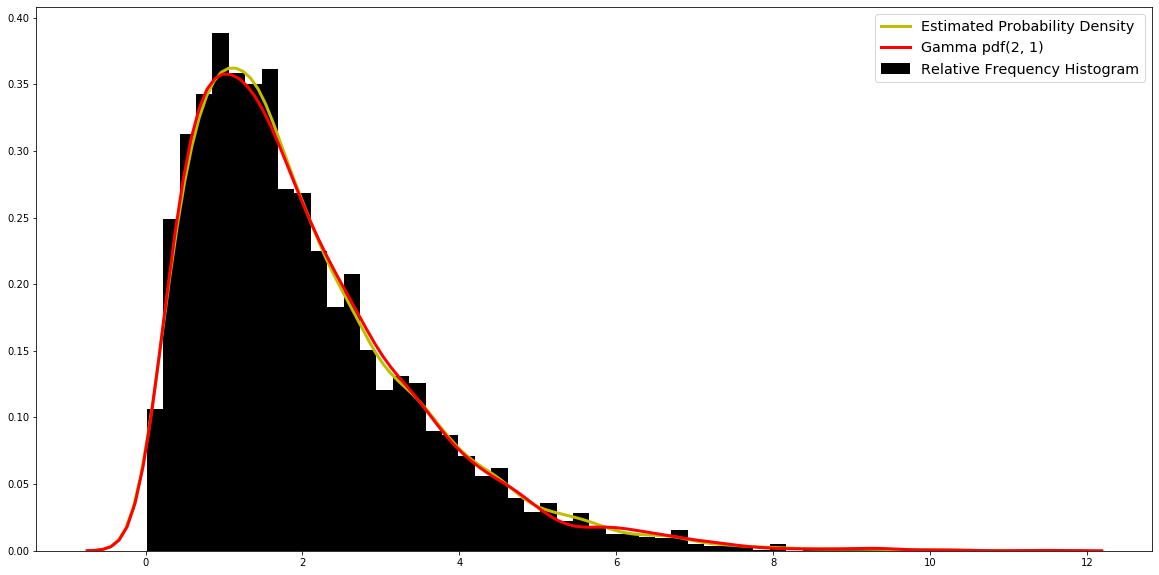

In [6]:
plt.figure(figsize=(20, 10))
sb.distplot(t[keep!=0], kde=True, kde_kws={"color": "y", "lw": 3, "label": "Estimated Probability Density"},
            hist_kws={"label": "Relative Frequency Histogram", "linewidth": 3, "alpha": 1, "color": "k"})

sb.distplot(np.random.gamma(2, size=n), kde=True, hist=False,
            kde_kws={"color": "r", "lw": 3, "label": "Gamma pdf(2, 1)"});
plt.legend(fontsize ='x-large')

2. (20 Points) Generate a random sample with sample size n = 5000 according to the following
probability density function (PDF)
f(x) / 1
12
(1 + x) exp −(x −2x1)2  ; x > 0:
Produce a plot similar to FIGURE 6.2. Report the acceptance rate of your algorithm. your
algorithm’s acceptance rate must be higher than 50% - otherwise, you will receive only half
of the full points. Show the generated random samples by superimposing the following three
items in another plot, using different line type for different curves, and display of legend.

(a) a relative frequency histogram with appropriate number of bars for your generated random numbers with sample size n = 5000;

C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


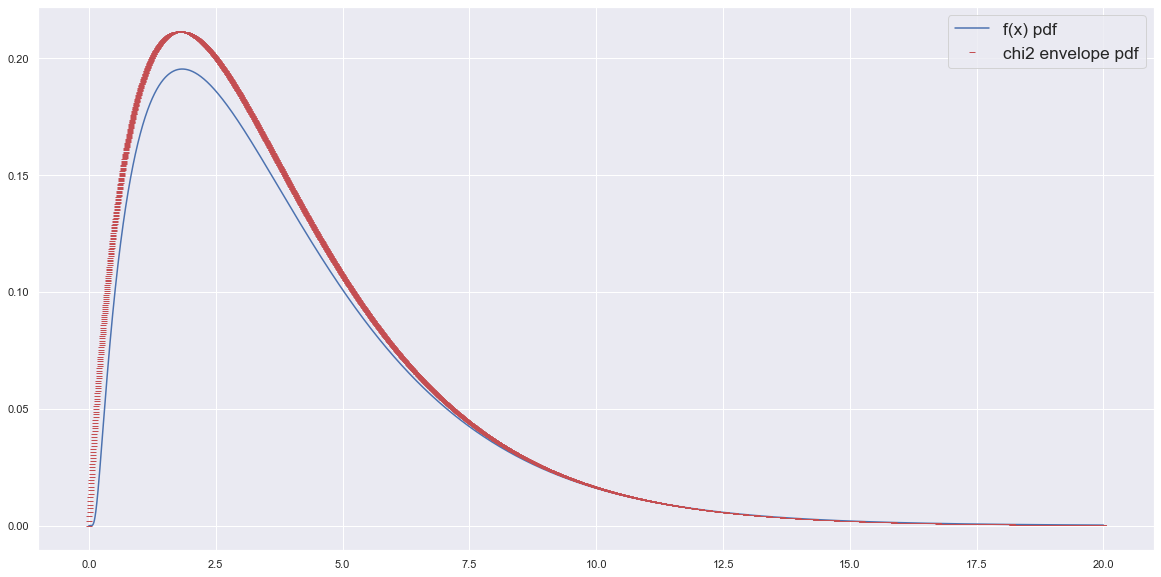

Acceptance rate: 0.9114


In [7]:
plt.figure(figsize=(20, 10))
sb.set()
from scipy.stats import chi2
def prob(x):
    return (1/12)*(1+x)*np.exp(-(x-1)**2/(2*x))

def q(x):
    return 1.1*chi2.pdf(x, 3.8, loc=0, scale=1)

def rejection_sampling(iter=5000):
    samples = []
    q_samples = []
    prob_samples = []
    for i in range(iter):
        z = np.random.chisquare(3.8,1)
        u = np.random.uniform(0, 1)
        
        if u <= (prob(z)/q(z)):
            samples.append(z)
            q_samples.append(q(z))
            prob_samples.append(prob(z))
    return {'z': np.array(samples), 'q':np.array(q_samples), 'p':np.array(prob_samples)} 

x= np.linspace(0,20, n)
g = q(x)
u = prob(x)
plt.plot(x, prob(x), 'b', label = 'f(x) pdf')
plt.plot(x, q(x),'r_', label = 'chi2 envelope pdf')
plt.legend(fontsize ='x-large')
plt.show()
res = rejection_sampling(iter=5000)
s = res['z']
q_s = res['q']
p_s = res['p']
print('Acceptance rate: ' + str(len(s)/n))

(b) an estimated probability density curve based on the generated random numbers;

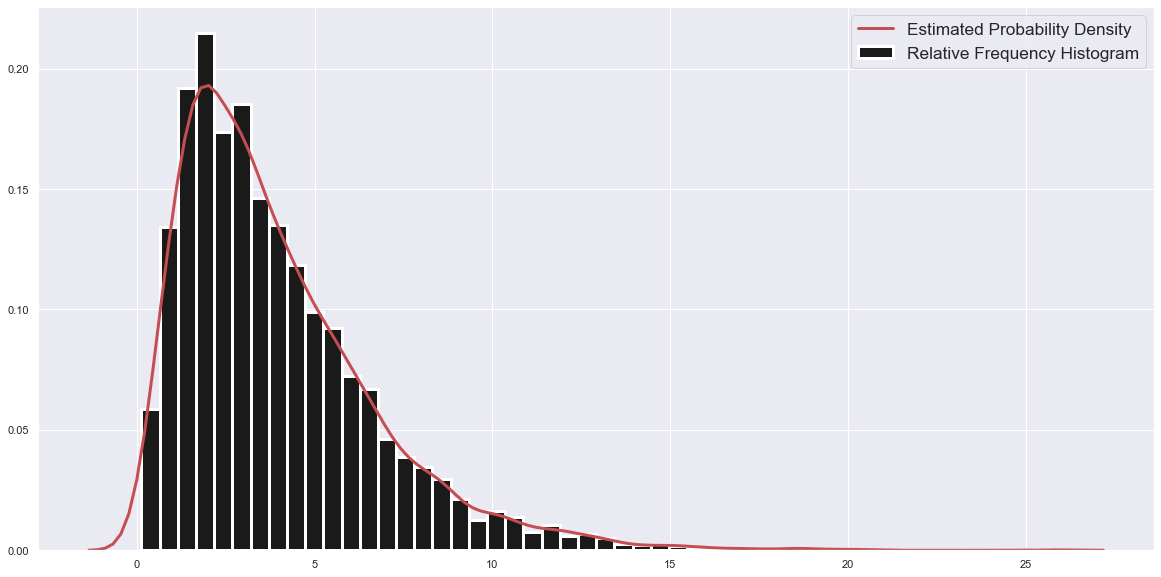

In [8]:
plt.figure(figsize=(20, 10))
sb.distplot(s, kde=True, kde_kws={"color": "r", "lw": 3, "label": "Estimated Probability Density"},
            hist_kws={"label": "Relative Frequency Histogram", "linewidth": 3, "alpha": 1, "color": "k"})
plt.legend(fontsize ='x-large')

(c) the true PDF.

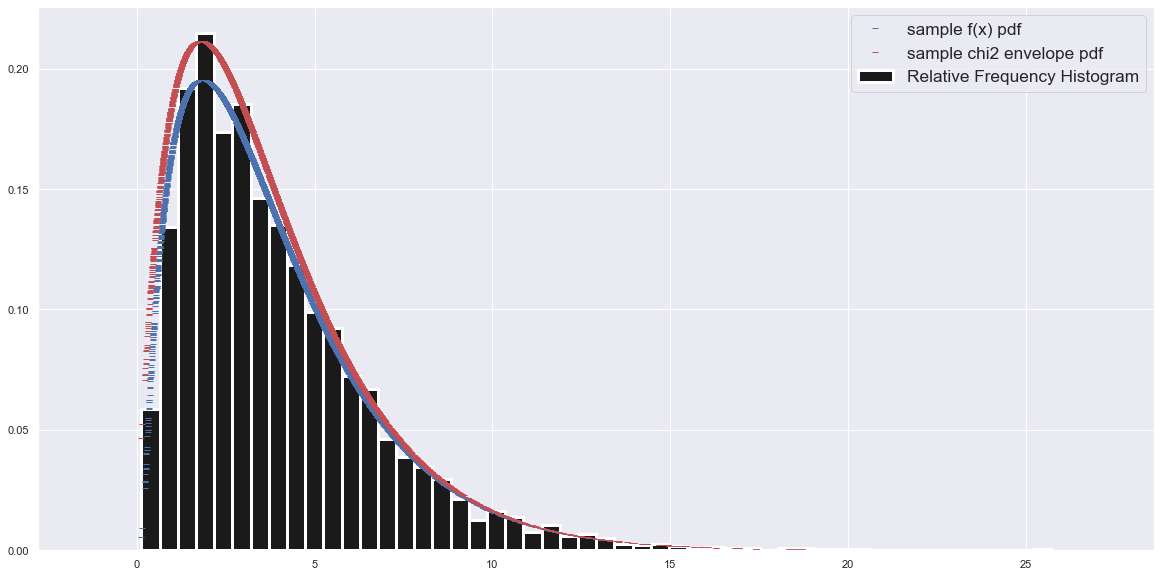

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(s, p_s, 'b_', label = 'sample f(x) pdf')
plt.plot(s, q_s,'r_', label = 'sample chi2 envelope pdf')
sb.distplot(s, kde=True, kde_kws={"color": "k", "lw": 0.001},
            hist_kws={"label": "Relative Frequency Histogram", "linewidth": 3, "alpha": 1, "color": "k"})
plt.legend(fontsize ='x-large')

## Non-Coding Assignments:

3. (10 Points) Let U1; U2; : : : ; Un be a random sample from UNIF[0,1] distribution. Let
U(n) = maxfU1; U2; : : : ; Ung
Prove that U(n) converges to 1 in probability.

lets see if U(n) converges in distribution,  thefore we prove that it only conveges to 1 and for all other values the probability will be zero. Assuming that there exists a small number $\epsilon$ > 0

\begin{equation*}
P(|X_n-1|\geq \epsilon) = P(X_n\leq 1-\epsilon) = P(X_i\leq 1 - \epsilon, i = 1,...,n) = (1-\epsilon)^n 
\end{equation*}

Therefore, as n goes to infinity the right hand side of the above equation goes to zero, indicating zero probability.